In [23]:
# !pip install keras

  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)


In [26]:
# !pip install jupyter notebook

In [27]:
# !pip install ipykernel

In [12]:
# !pip install pandas

In [13]:
# !pip install sklearn

In [1]:
# !pip install matplotlib

In [16]:
# !pip install seaborn

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.metrics import classification_report

In [8]:
y=[0,0,0,1,1,0,0]
yhat=[0,0,0,0,1,1,1]

In [9]:
print(classification_report(y,yhat))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.33      0.50      0.40         2

    accuracy                           0.57         7
   macro avg       0.54      0.55      0.53         7
weighted avg       0.63      0.57      0.59         7



In [ ]:
# 농구 게임 데이터 -> 포지션 예상 모델 생성
# 임의의 게임 성적 데이터 ---> 입력 ---> 예상 포지션 출력

In [8]:
df=pd.read_csv('f:/data/basketball_stat.csv')
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [10]:
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

In [9]:
df.Pos.unique()

array(['SG', 'C'], dtype=object)

In [13]:
df.columns

Index(['Player', 'Pos', '3P', '2P', 'TRB', 'AST', 'STL', 'BLK'], dtype='object')

C:\Users\poeun\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


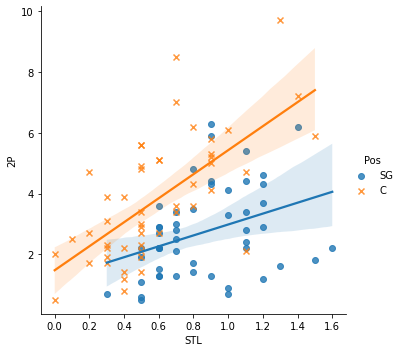

In [20]:
sns.lmplot('STL', '2P', data=df, fit_reg=True,
hue='Pos', markers=['o','x'])
# fit_reg = 회귀선 출력 여부
# linear model plot

C:\Users\poeun\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


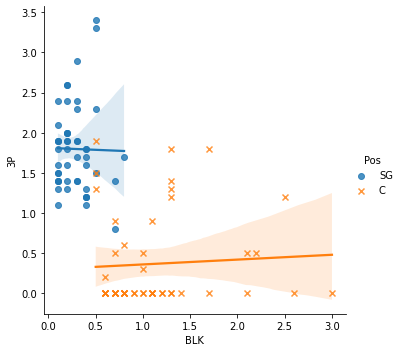

In [21]:
sns.lmplot('BLK', '3P', data=df, fit_reg=True,
hue='Pos', markers=['o','x'])

C:\Users\poeun\anaconda3\envs\pytorch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


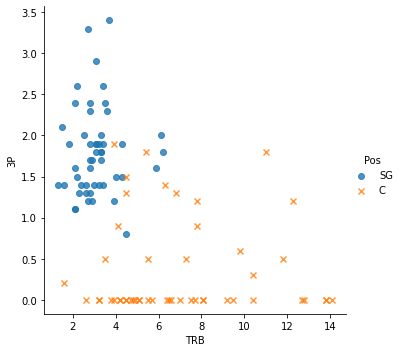

In [28]:
sns.lmplot('TRB', '3P', data=df, fit_reg=False,
hue='Pos', markers=['o','x'])

In [30]:
df.drop(['2P', 'AST', 'STL'], axis=1, inplace=True)

In [31]:
df

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5
...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,10.4,1.0
96,Dwyane Wade,SG,0.8,4.5,0.7
97,Dion Waiters,SG,1.8,3.3,0.4
98,Hassan Whiteside,C,0.0,14.1,2.1


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
train, test = train_test_split(df, test_size=0.2)

In [35]:
test.shape
train.shape

(80, 5)

In [36]:
import pickle

In [40]:
# 파일로 저장
with open('basketball_train.pkl', 'wb') as train_data:
    pickle.dump(train, train_data)

In [41]:
with open('basketball_train.pkl', 'wb') as test_data:
    pickle.dump(test, test_data)

In [42]:
with open('basketball_train.pkl', 'rb') as train_data:
    mytrain=pickle.load(train_data)

In [43]:
with open('basketball_train.pkl', 'rb') as test_data:
    mytest=pickle.load(test_data)

In [44]:
mytest

,Player,Pos,3P,TRB,BLK
48,Richaun Holmes,C,0.5,5.5,1.0
95,Nikola Vucevic,C,0.3,10.4,1.0
58,Zach LaVine,SG,2.6,3.4,0.2
81,Marcus Smart,SG,1.2,3.9,0.4
86,Nik Stauskas,SG,1.7,2.8,0.4
31,Pau Gasol,C,0.9,7.8,1.1
1,Steven Adams,C,0.0,7.7,1.0
73,Victor Oladipo,SG,1.9,4.3,0.3
22,Troy Daniels,SG,2.1,1.5,0.1
17,Jordan Clarkson,SG,1.4,3.0,0.1
